## Exploring null data

### Libraries


In [1]:
import pandas as pd
import numpy as np

Python

In [2]:
print(None or True, None or False, None == None, type(None), sep='\n')

True
False
True
<class 'NoneType'>


Numpy

In [3]:
print(np.nan or True, np.nan ==np.nan, np.nan is np.nan, type(np.nan), sep='\n')

nan
False
True
<class 'float'>


Pandas

In [4]:
missing_tests = pd.DataFrame.from_dict(data= dict(x = [0, 1, np.nan, np.nan, None], y = [0,1,pd.NA, np.nan, None]))
missing_tests

,x,y
0,0.0,0
1,1.0,1
2,NaN,<NA>
3,NaN,NaN
4,NaN,None


In [5]:
missing_tests.isna()

,x,y
0,False,False
1,False,False
2,True,True
3,True,True
4,True,True


In [6]:
pd.Series([pd.to_datetime('2022-01-01'), np.nan])

0   2022-01-01
1          NaT
dtype: datetime64[ns]

# Identification of null data

In [7]:
%pip install pyjanitor # Permite hacer una ejecución de limpieza de datos nulos
%pip install missingno # Identifica datos nulos a traves de missing
%pip install pyreadr # Permite leer conjuntos de datos guardados como rda
%pip install session_info # Mide el tiempo de acción de datos nulos
%pip install UpSetPlot # Grafico de relación de datos faltanes, dice el por qué del dato nulo y su relación con otras variables

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [8]:
import warnings
warnings.filterwarnings('ignore') # Ignora los mensajes de advertencia
import janitor
import matplotlib.pyplot as plt
import missingno
import numpy as np
import pandas as pd
import pyreadr
import session_info
import seaborn as sns
import session_info
import upsetplot

# Pandas extension library

In [9]:
%run ./explore_tools/pandas-missing-extension.ipynb

Data load

In [11]:
result = pyreadr.read_r('./explore_tools/riskfactors.rda')
risk_data = result['riskfactors']
risk_data.head()

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,26,Female,49,190,64,32.68,Married,NaN,0,6,...,No,NaN,NaN,NaN,1095,261,104,156,521,12
1,40,Female,48,170,68,25.90,Divorced,NaN,0,5,...,No,NaN,NaN,NaN,52,209,52,0,52,0
2,72,Female,55,163,64,28.04,Married,NaN,0,4,...,No,NaN,NaN,NaN,36,156,52,24,24,24
3,42,Male,42,230,74,29.59,Married,NaN,1,6,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,32,Female,66,135,62,24.74,Widowed,NaN,0,5,...,Yes,Everyday,Yes,NaN,-7,261,209,261,365,104


In [12]:
risk_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   state             245 non-null    category
 1   sex               245 non-null    category
 2   age               245 non-null    int32   
 3   weight_lbs        235 non-null    object  
 4   height_inch       243 non-null    object  
 5   bmi               234 non-null    float64 
 6   marital           244 non-null    category
 7   pregnant          30 non-null     category
 8   children          245 non-null    int32   
 9   education         244 non-null    category
 10  employment        245 non-null    category
 11  income            245 non-null    category
 12  veteran           242 non-null    category
 13  hispanic          243 non-null    category
 14  health_general    245 non-null    category
 15  health_physical   245 non-null    int32   
 16  health_mental     245 non-

Basic review of data

In [13]:
# Shape of the data
risk_data.shape

(245, 34)

In [14]:
# Number of complete registers
risk_data.missing.number_complete()

7144

In [15]:
#Number of null registers
risk_data.missing.number_missing()

1186

In [16]:
risk_data.missing.missing_variable_summary()

,variable,n_missing,n_cases,pct_missing
0,state,0,245,0.000000
1,sex,0,245,0.000000
2,age,0,245,0.000000
3,weight_lbs,10,245,4.081633
4,height_inch,2,245,0.816327
5,bmi,11,245,4.489796
6,marital,1,245,0.408163
7,pregnant,215,245,87.755102
8,children,0,245,0.000000
9,education,1,245,0.408163


In [17]:
# Number of variables with similar 
risk_data.missing.missing_variable_table()

AttributeError: 'DataFrame' object has no attribute 'n_variables'

In [18]:
# Number of register respect to the number of null values
# For example, the first record has 3 missing values of 10, so it has 30% of missing values, that is pct_missing
risk_data.missing.missing_case_summary()

,case,n_missing,pct_missing
0,0,6,16.666667
1,1,6,16.666667
2,2,7,19.444444
3,3,12,33.333333
4,4,5,13.888889
...,...,...,...
240,240,6,16.666667
241,241,5,13.888889
242,242,3,8.333333
243,243,2,5.555556


Visualization of missing data

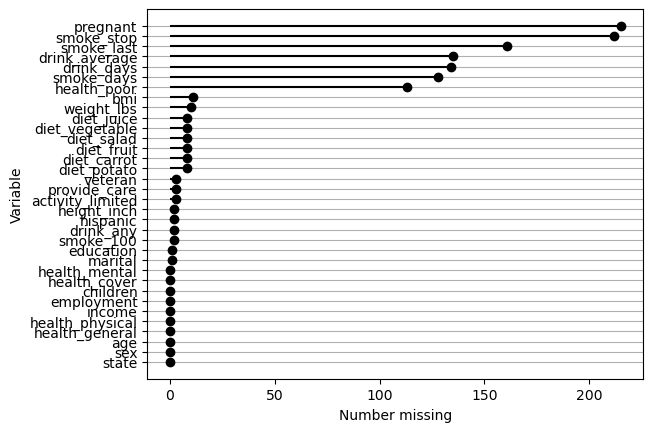

In [19]:
# The relationship of the variables from it's impact (number) of missing values
risk_data.missing.missing_variable_plot()

<Axes: >

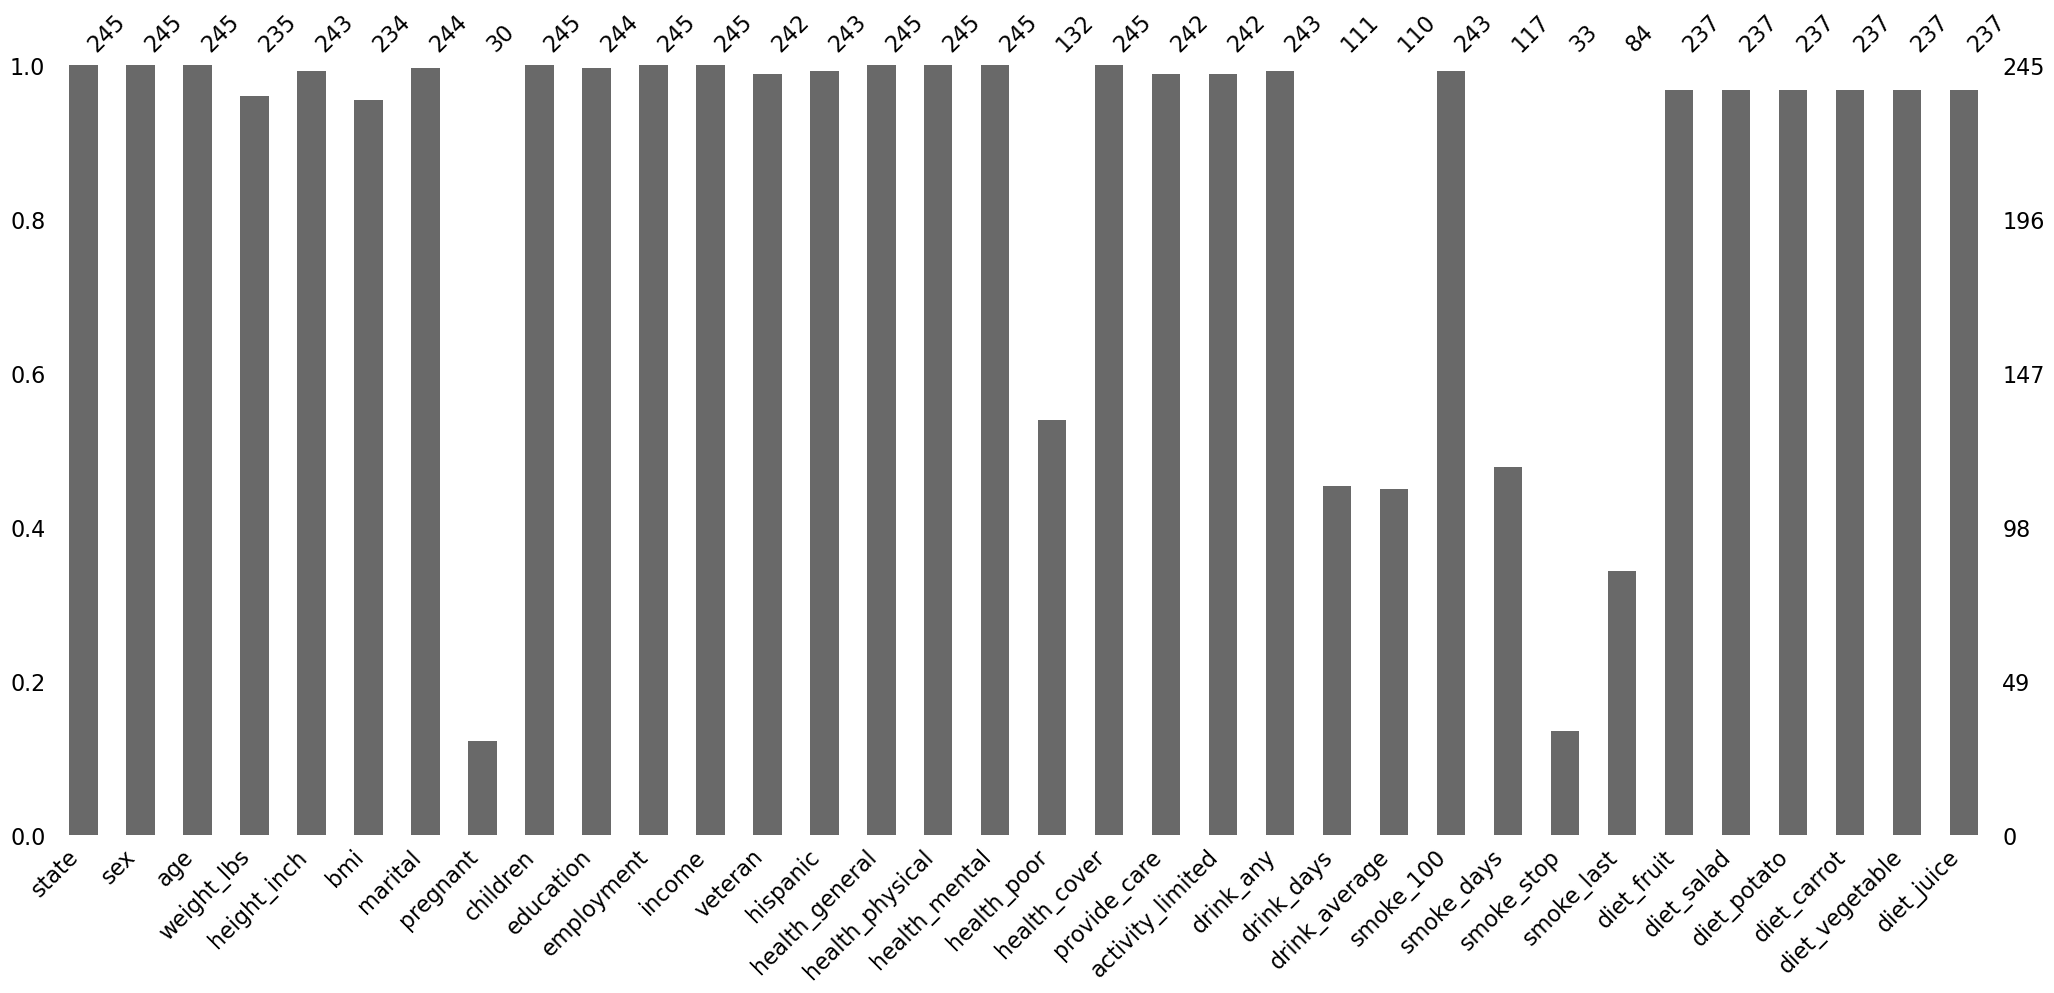

In [20]:
missingno.bar(risk_data)

<Axes: >

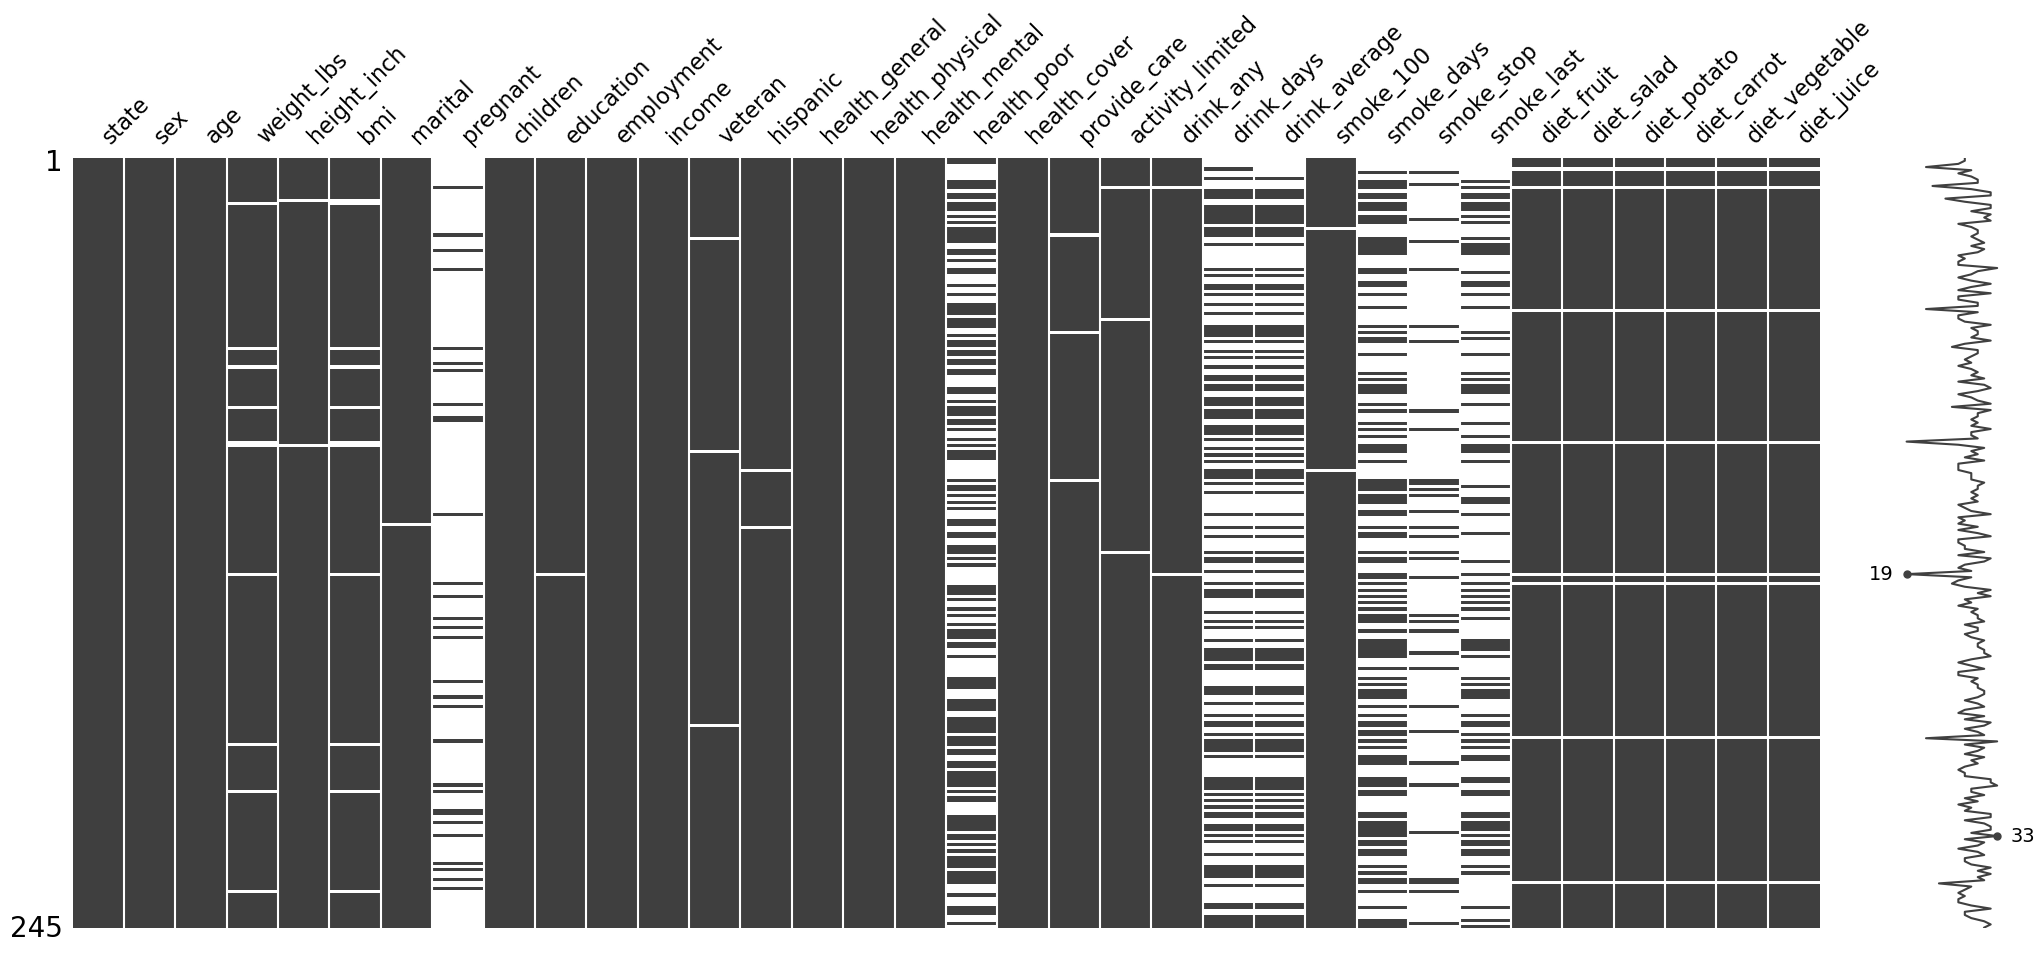

In [21]:
missingno.matrix(risk_data)
# The shape like the heart wave is the records with the same missing values 